In [55]:
import json
import glob
from PIL import Image
import requests
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.transform import resize




In [136]:
def extract_img_heatmap(json_pth, normalize = False):
    with open(json_pth) as f:
        loaded_json = json.loads(f.readline())
        
    x = loaded_json['loss']
    target = loaded_json['target']
    
    if normalize:
        facts = loaded_json['factors']
        for i, f in enumerate(facts):
            x[i+1] /= 1+sum([1-fi for fi in f])
    
    y = ((np.array(x[1:]))-np.array(x[0])) #**2
    #y[y>0] = 0.
    #y = ((np.array(x[1:])**2)-np.array(x[0])**2)**2
    y= y.reshape(12,12)
    y = resize(y,(30,30))
    
    fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
    
    ax1.set_title(json_pth.split('/')[-3] + " // " + target)
    raw_image = Image.open(loaded_json['img'].replace('/root/bjoern/atman_other_model/','/nfs/scratch_2/bjoern/atman_other_model/'))
    raw_image.resize((300,300))
    ax1.imshow(raw_image)
    ax1.axis('off')
    
    z1 = y.copy()
    z1[y>0] = 0.
    im2 = ax2.imshow(-z1)
    
    z2 = y.copy()
    z2[y<0] = 0.
    im3 = ax3.imshow(z2)
    
    z = y.copy()**2
    im4 = ax4.imshow(z)
    
    scale = np.absolute(z).max()
    z = (z1/scale)+(z2/scale)
    im5 = ax5.imshow(z)


    #ax2.imshow(y>.01)
    ax2.axis('off')
    #ax2.colorbar()
    return y

/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Bottle/images/1.jpg_explanation_run2_Bottle.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Hippopotamus/images/1.jpg_explanation_run2_Hippopotamus.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Raven/images/1.jpg_explanation_run2_Raven.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/High heels/images/1.jpg_explanation_run2_High heels.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Lipstick/images/1.jpg_explanation_run2_Lipstick.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Jeans/images/1.jpg_explanation_run2_Jeans.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Jaguar (Animal)/images/1.jpg_explanation_run2_Jaguar .json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Tap/images/1.jpg_explanation_run2_Tap.json
/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Swimwear/images/1.jpg_explanation_run2_Swimwear.json
/nfs/scratch_2/bjoern/atman

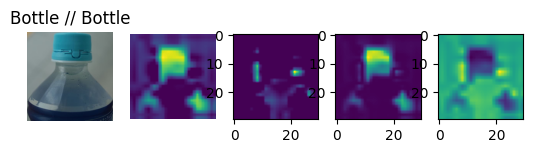

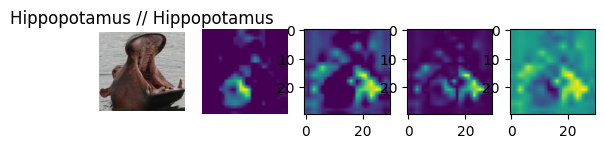

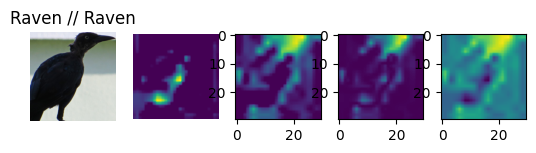

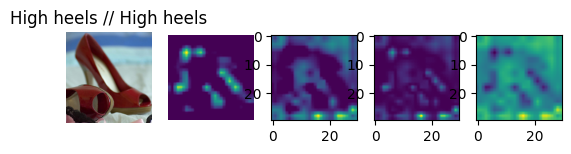

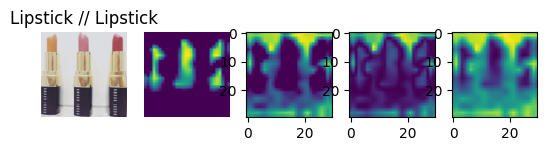

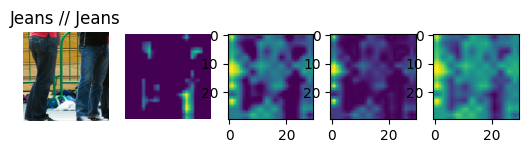

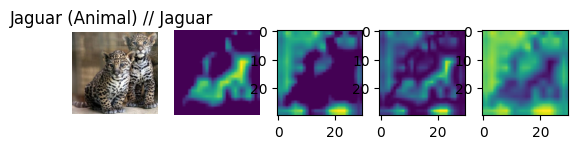

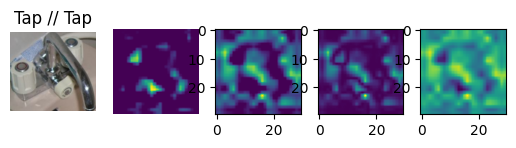

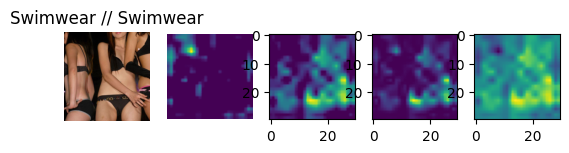

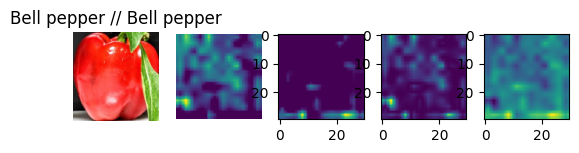

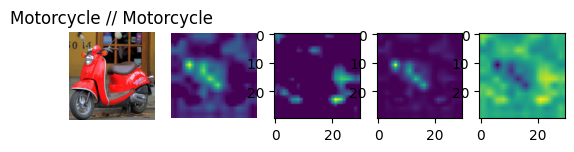

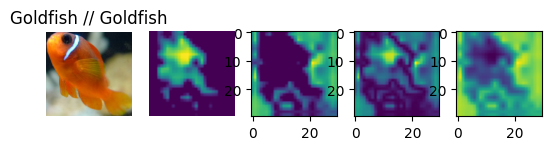

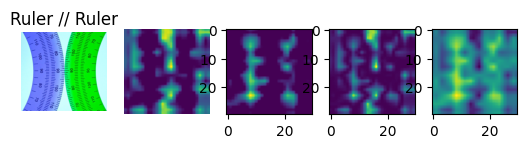

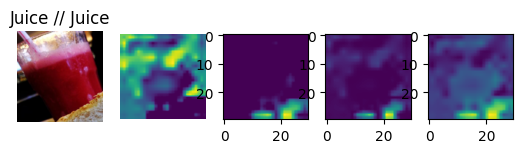

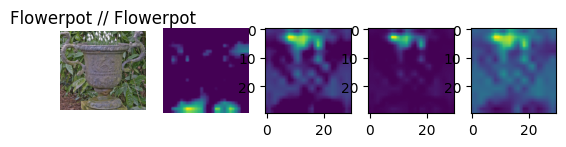

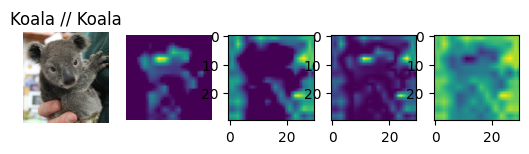

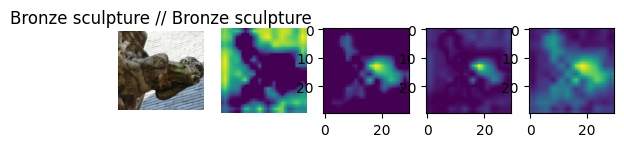

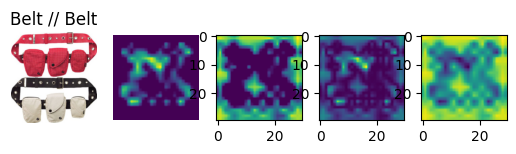

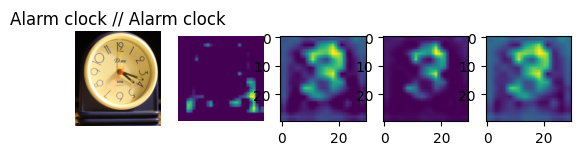

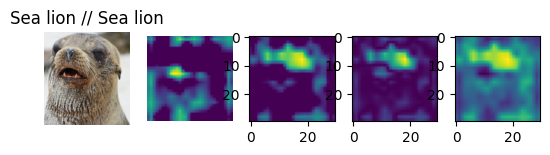

In [137]:
#suffix = '7_fix2' #failure
#suffix = '7_fix3' #better at least?
#suffix='8_AH' 
#suffix='7_fix3'
#suffix='19_cap_suppressions'
#suffix='51_cap_suppressions_magmastyle_dog'
suffix='run2'

#for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/*/images/*_explanation_*Lipstick*')[:]:
for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/*/images/*_explanation_{suffix}*')[:20]: #[40:60]: #[40:50]:
#for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/others/BLIP/test_folder/*_explanation_{suffix}*'):
    print(p)
    extract_img_heatmap(p)#, True)

In [98]:
import pickle

In [99]:
with open('/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Lynx/images/1.jpg_similarity.pickle', 'rb') as f:
    sim = pickle.load(f)

/tmp/ipykernel_183411/1764723571.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


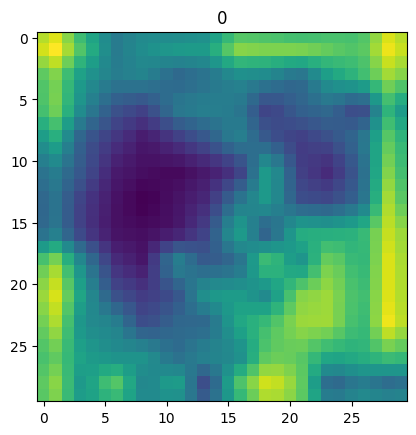

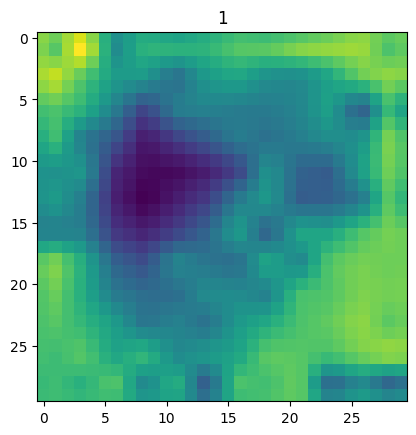

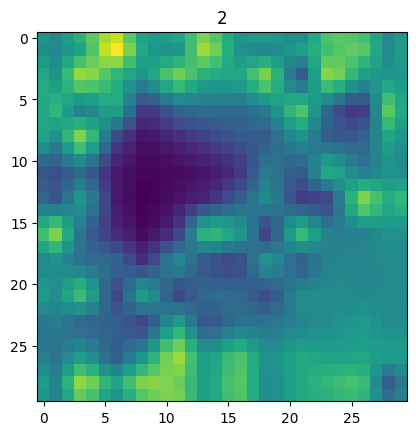

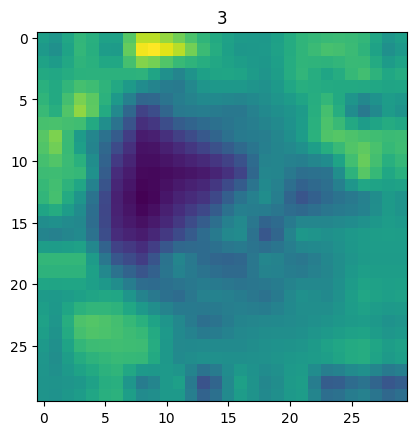

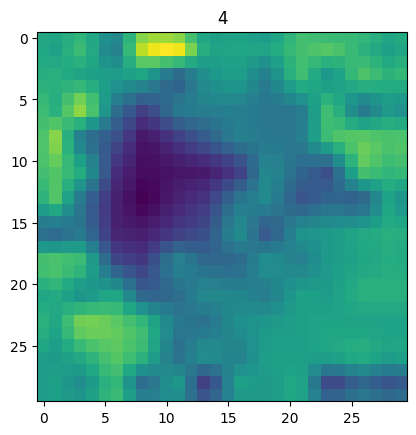

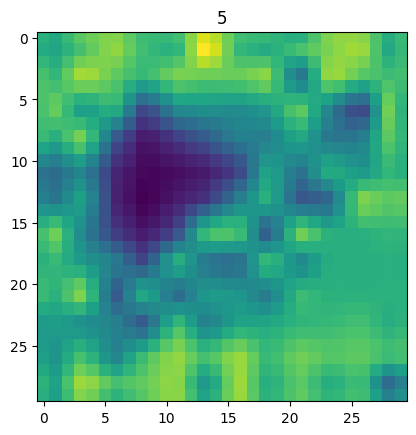

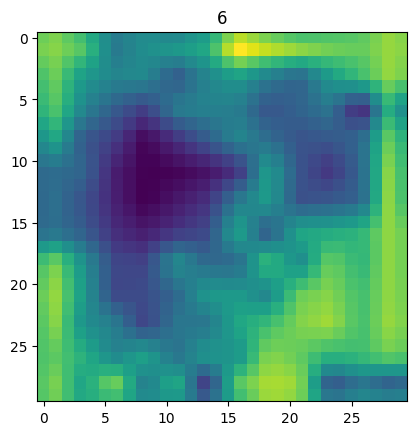

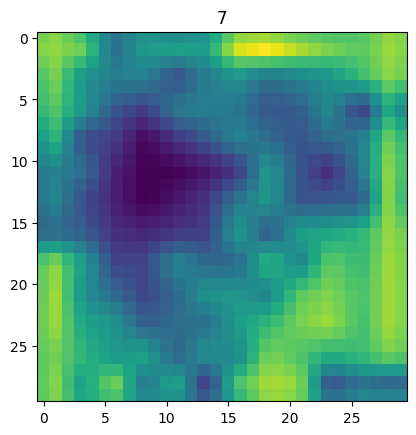

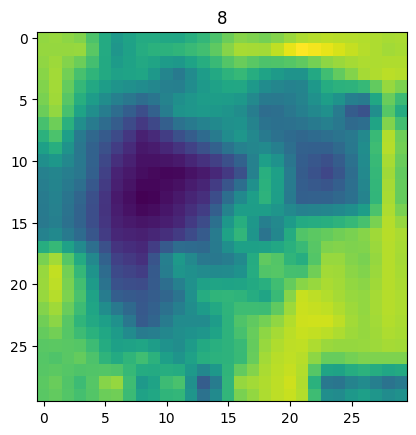

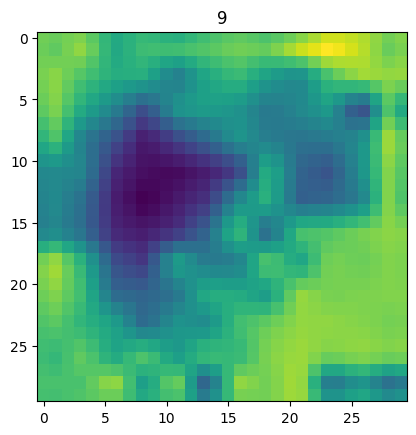

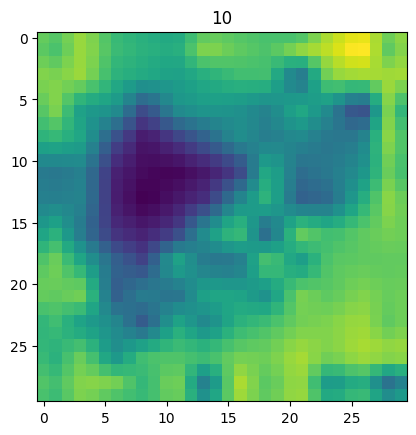

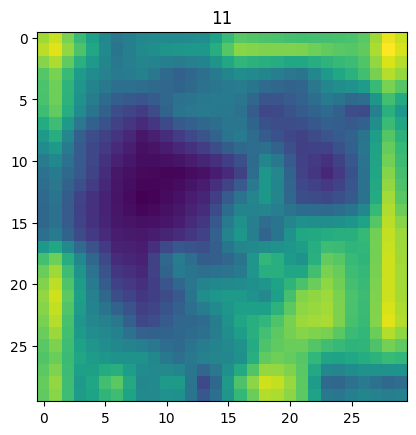

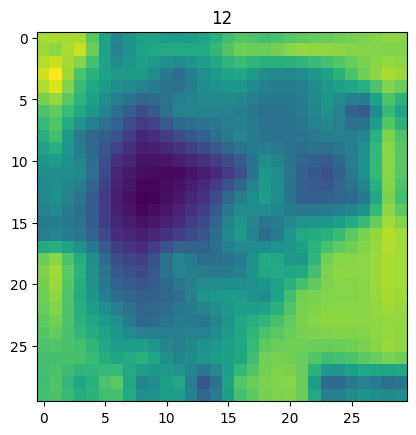

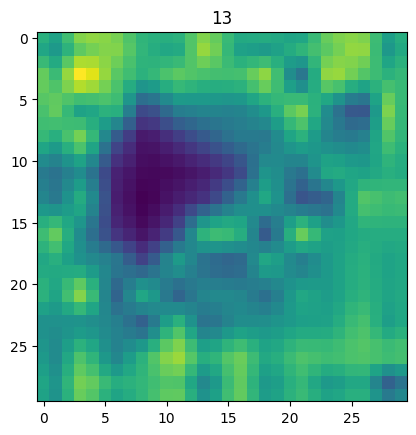

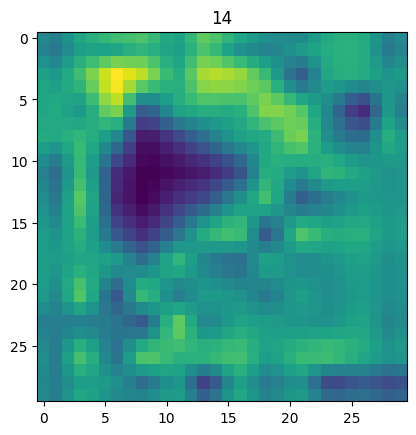

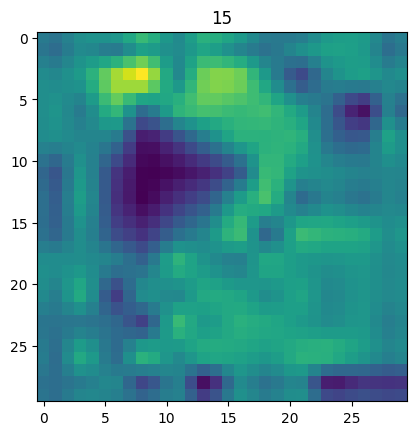

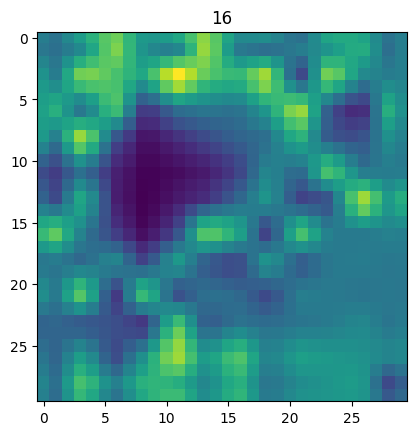

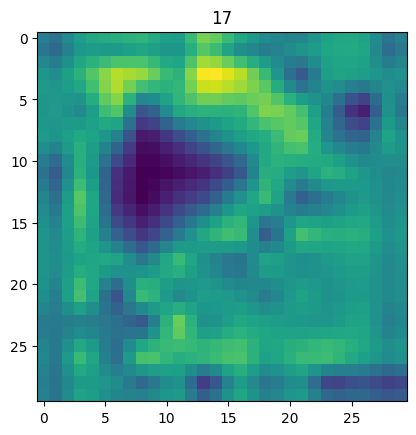

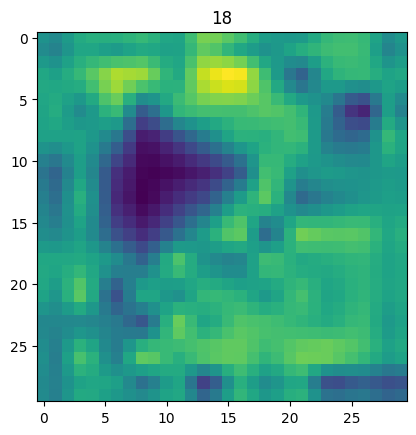

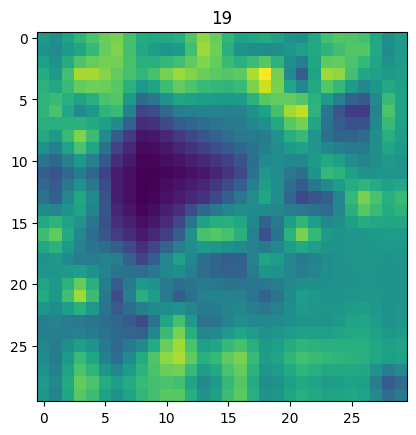

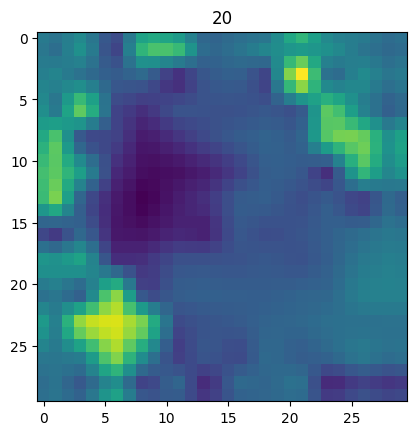

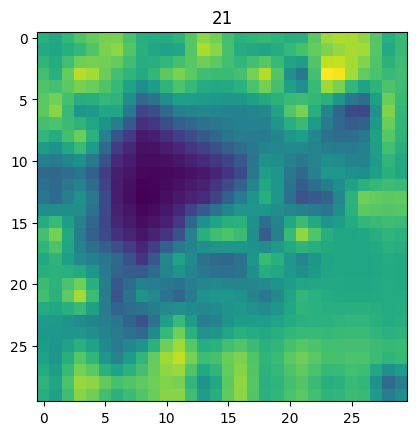

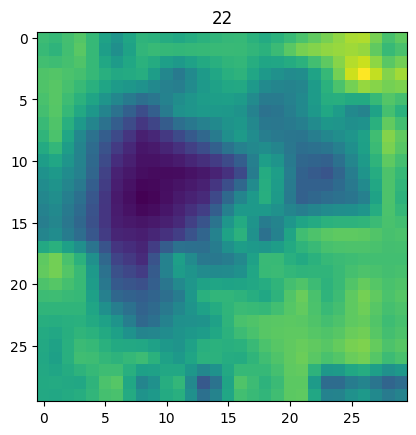

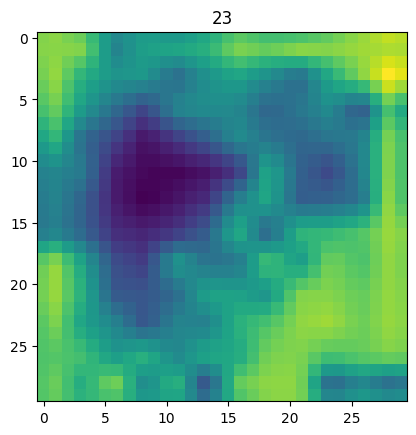

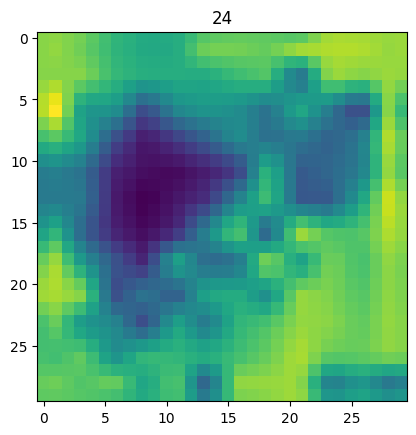

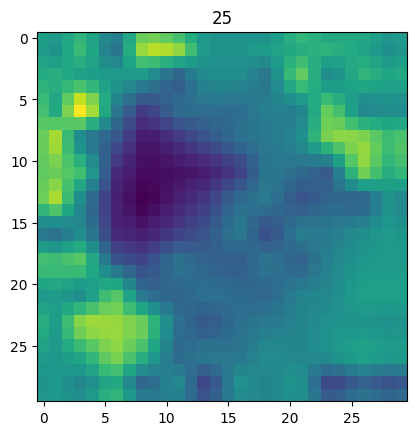

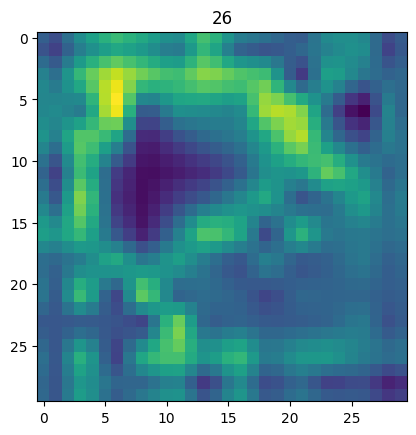

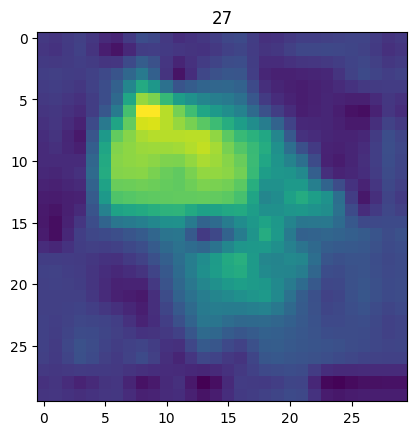

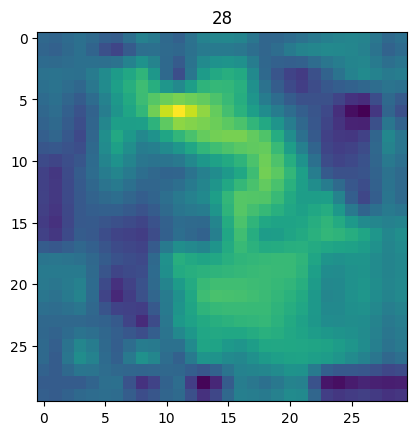

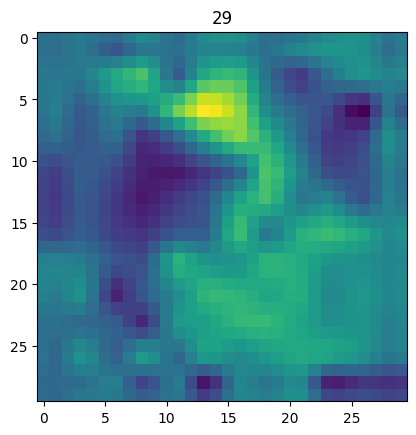

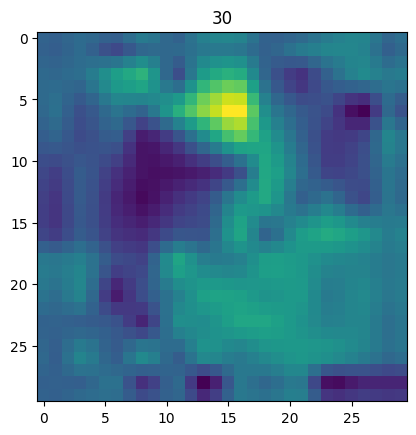

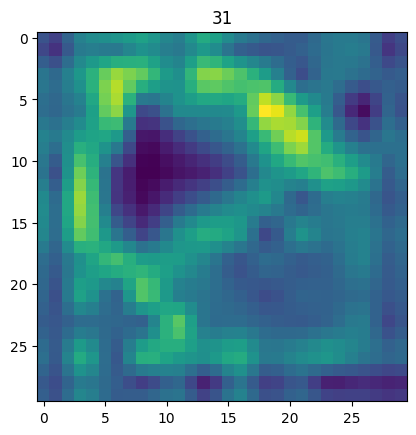

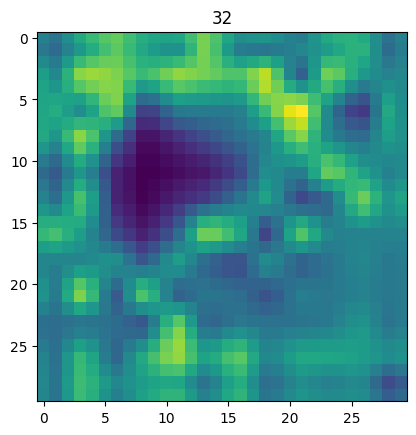

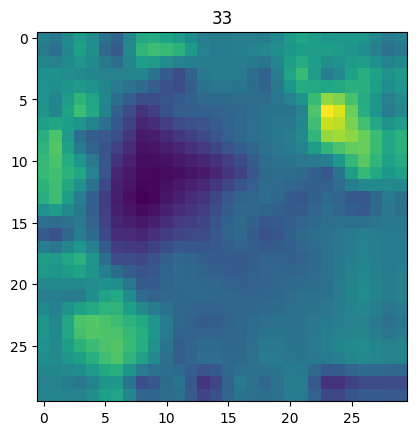

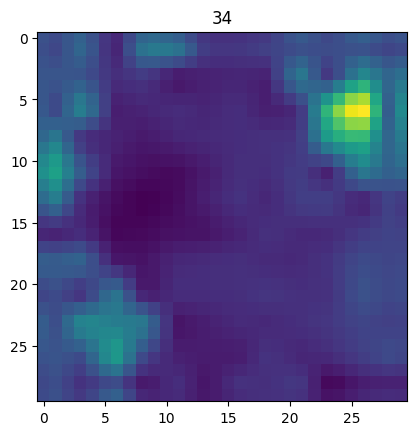

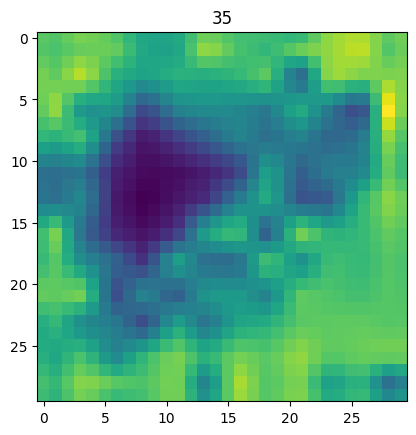

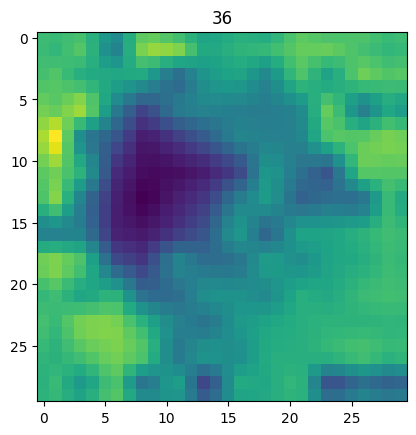

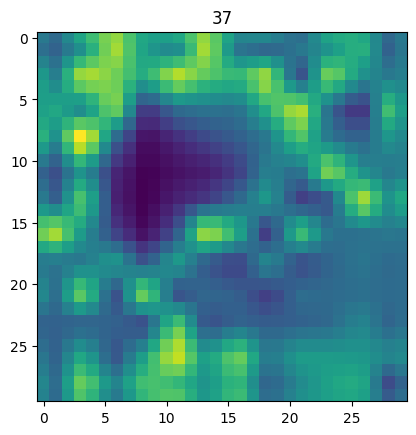

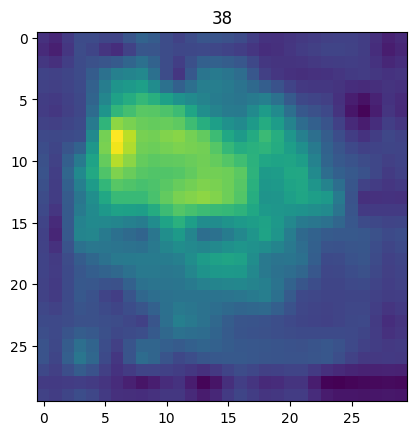

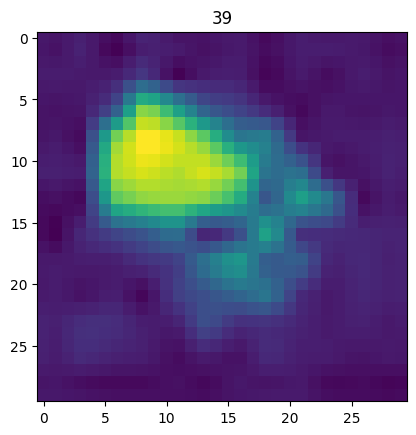

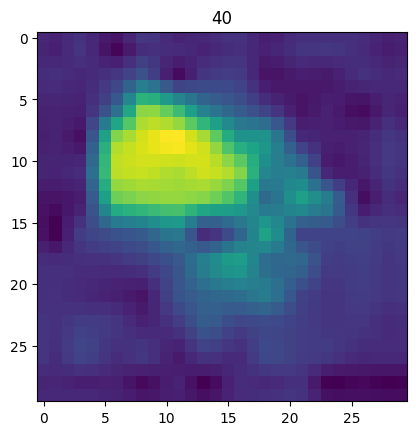

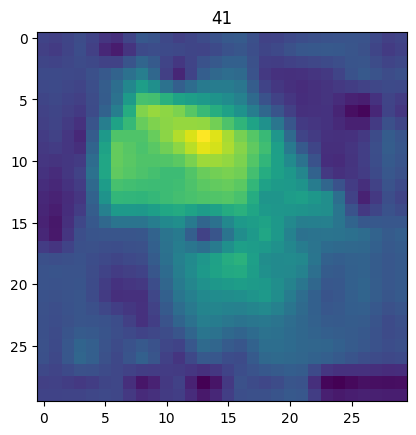

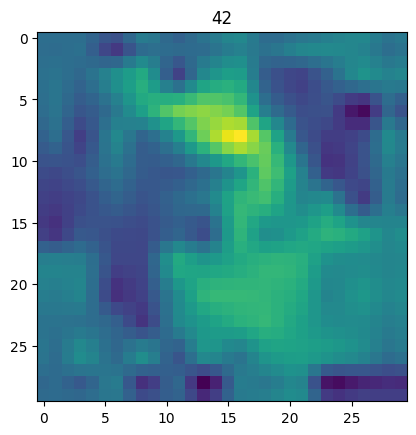

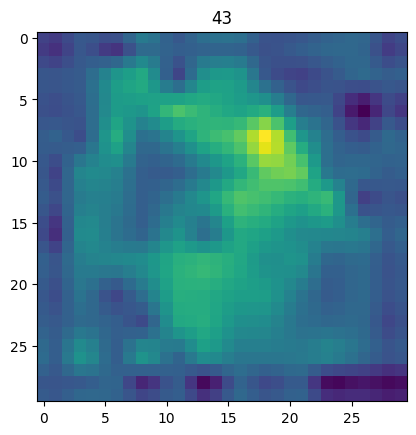

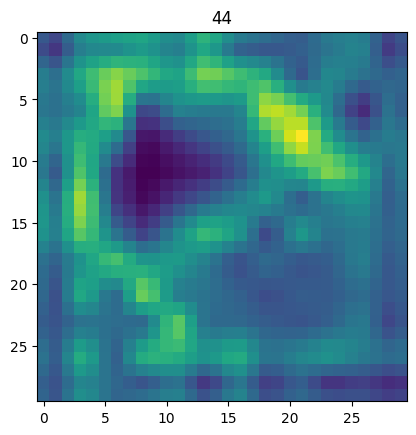

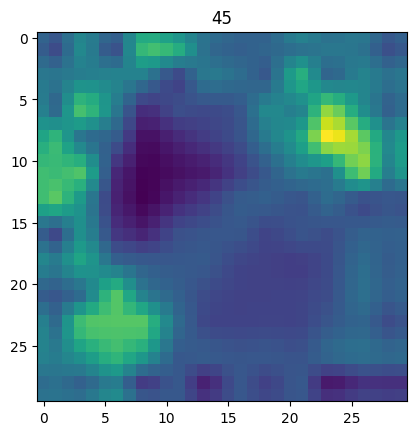

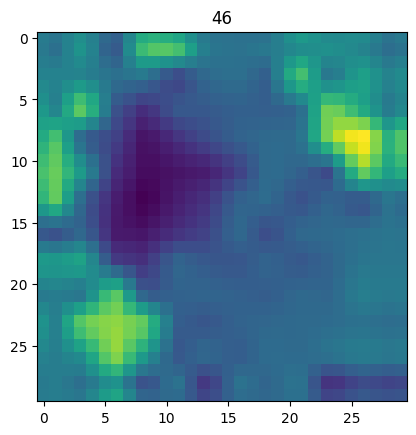

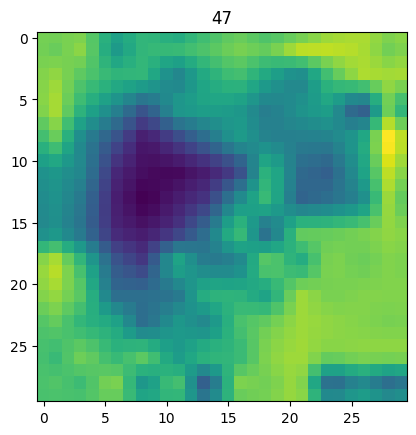

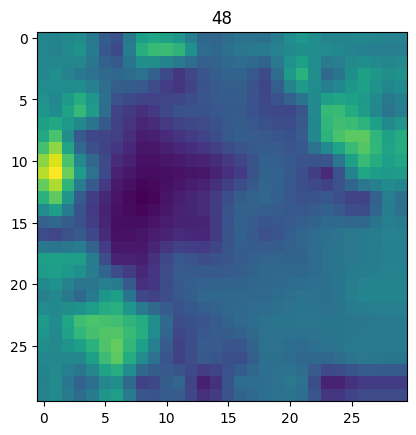

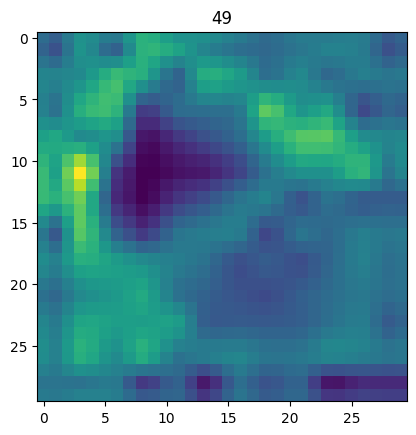

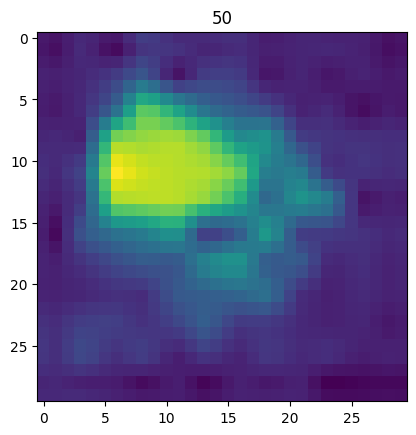

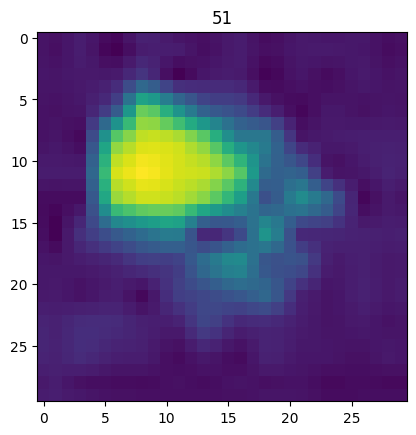

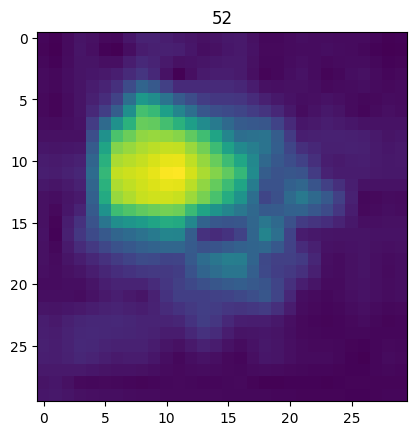

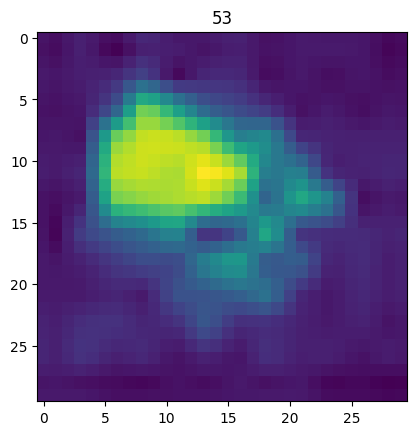

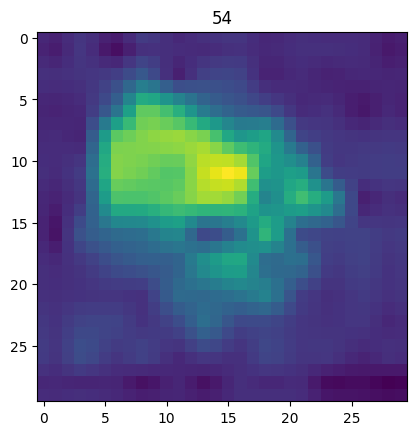

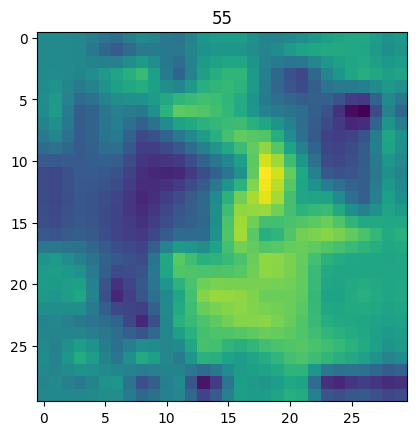

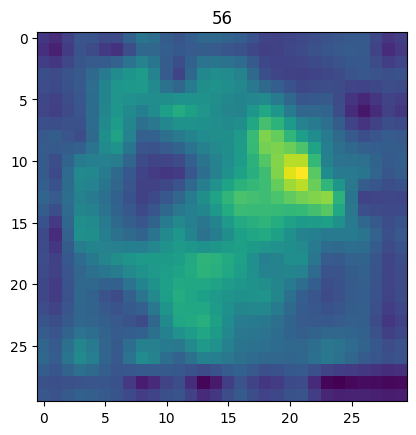

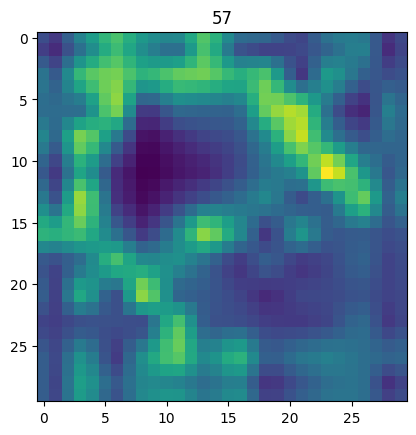

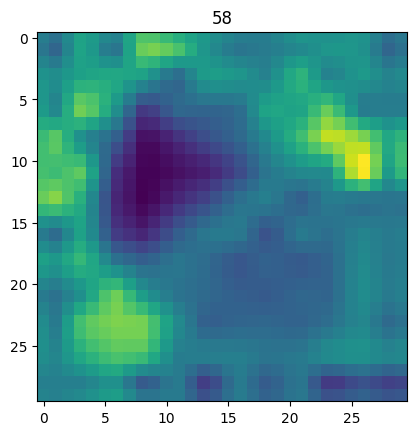

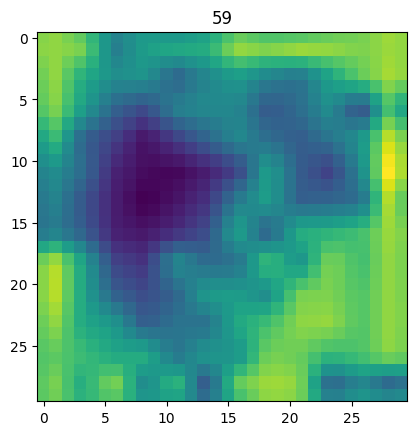

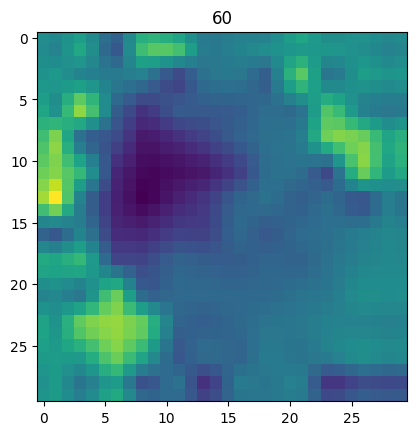

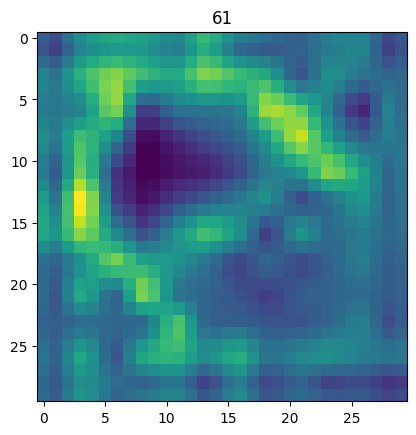

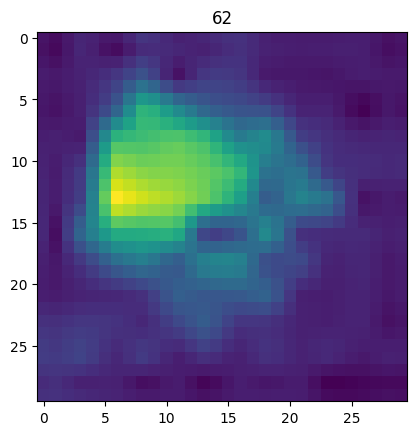

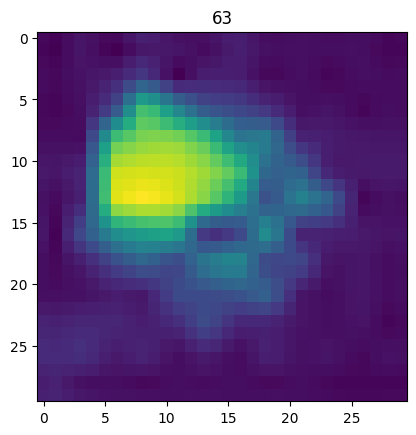

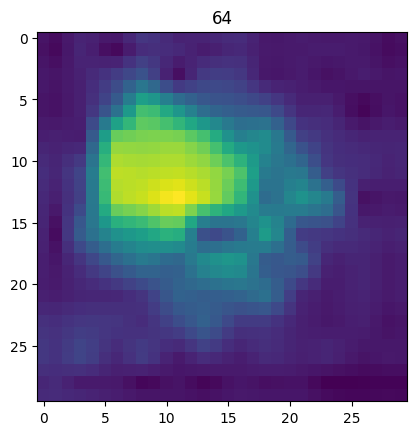

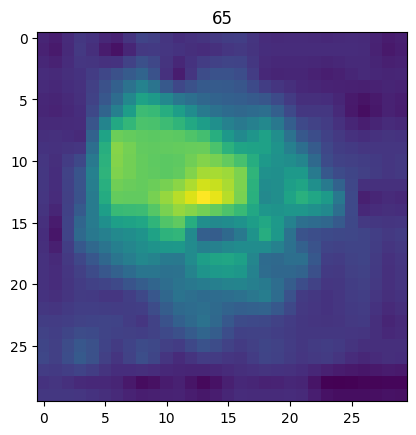

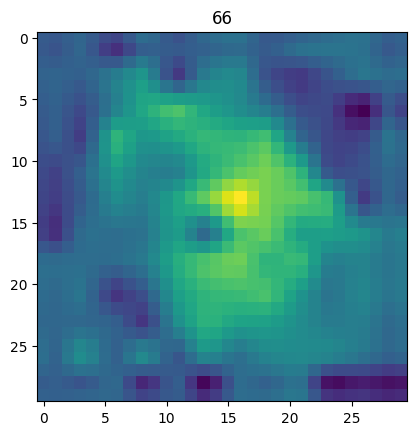

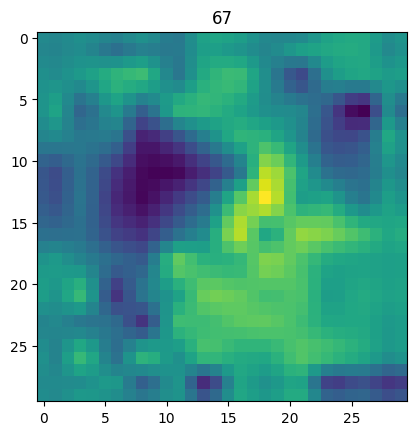

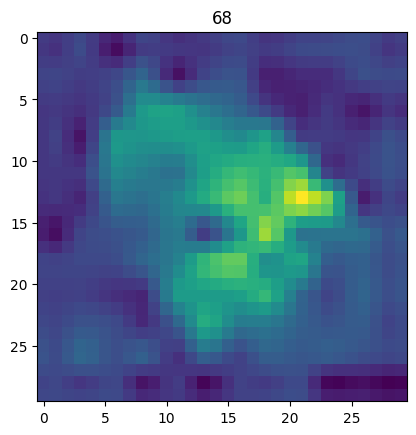

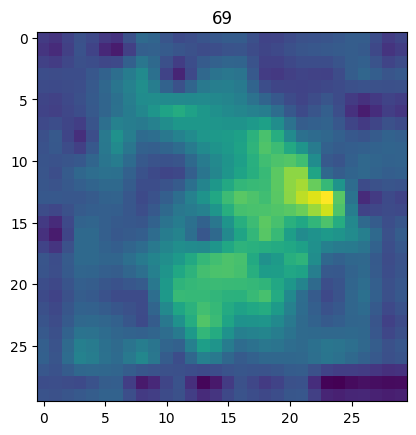

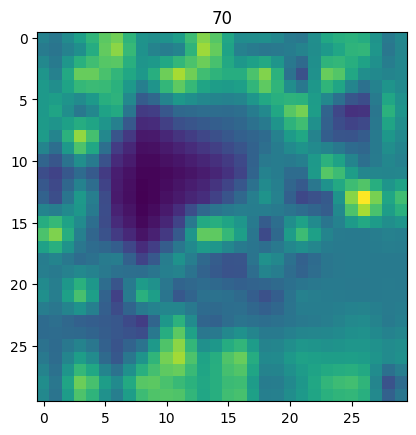

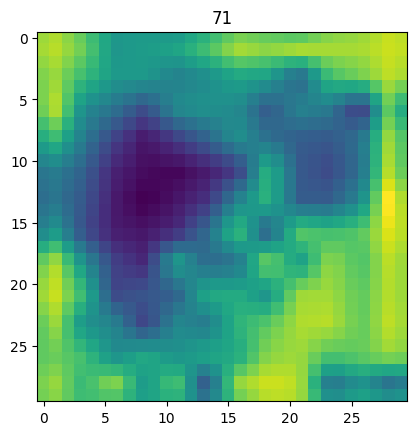

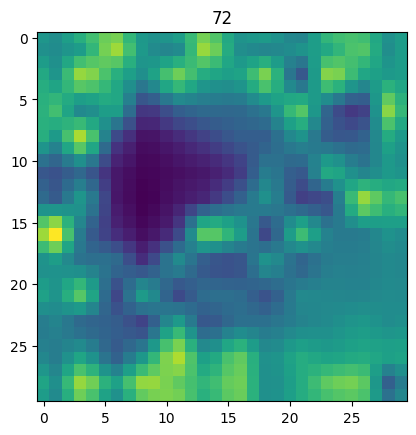

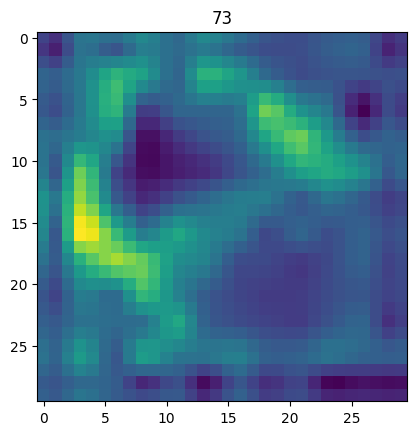

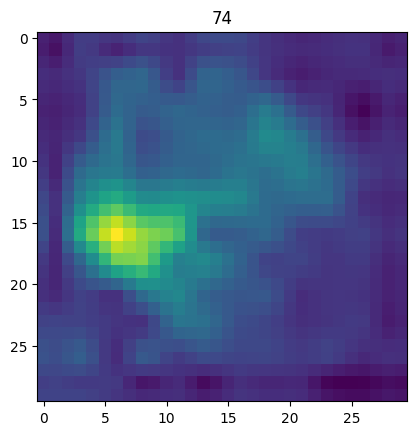

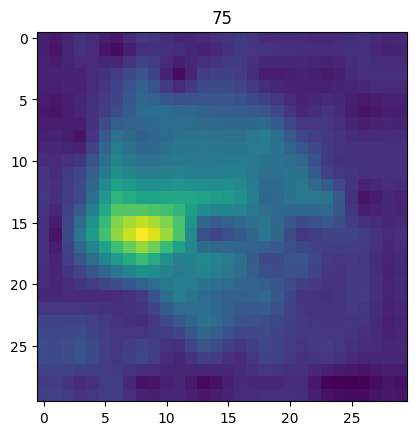

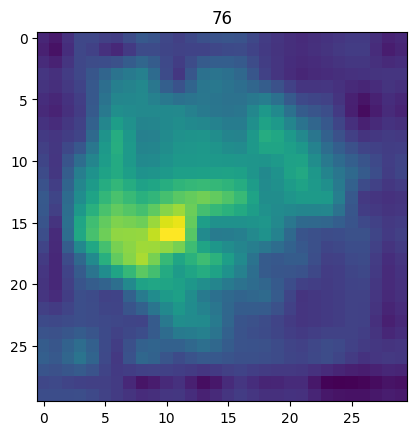

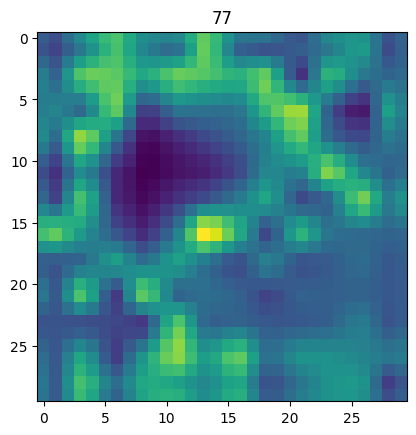

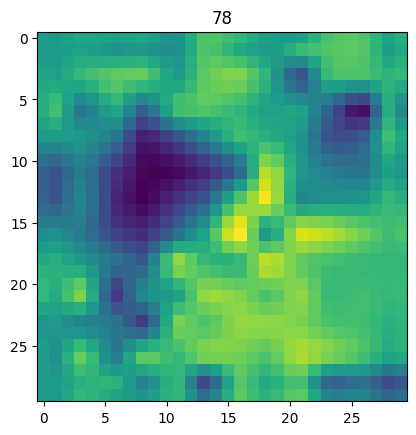

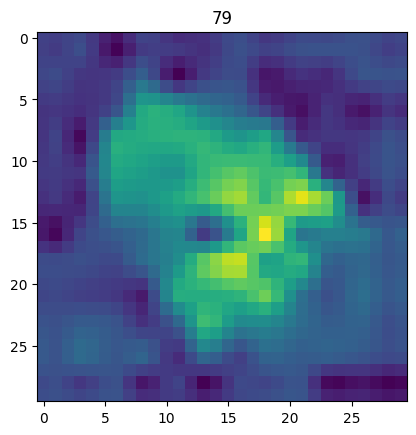

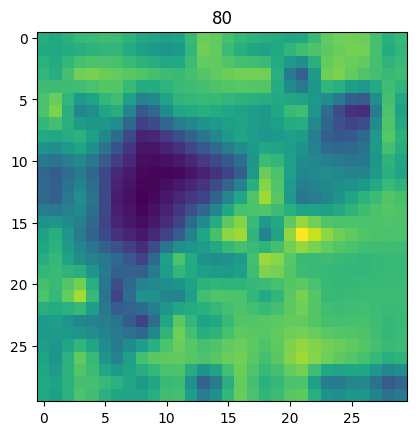

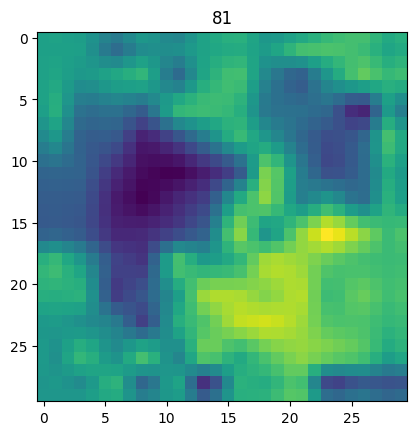

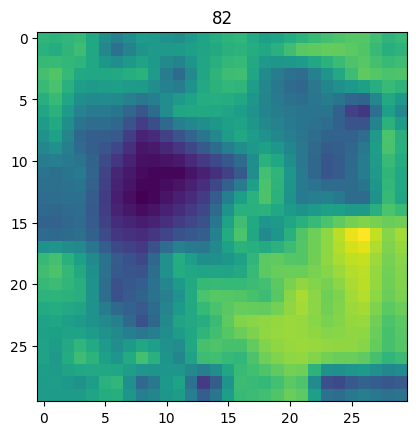

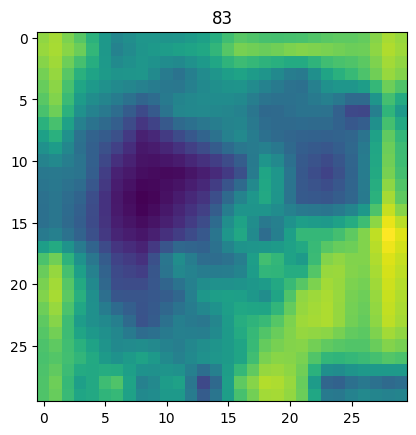

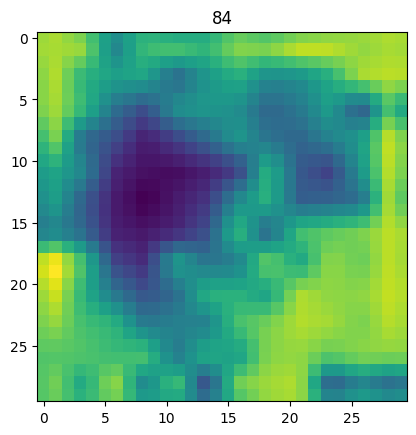

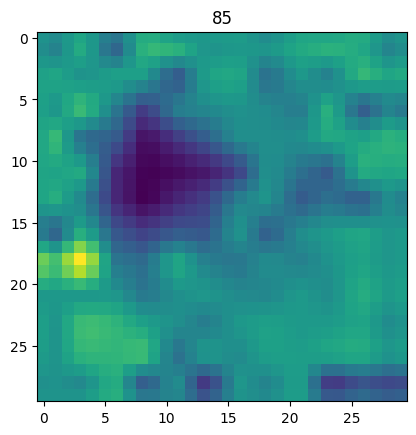

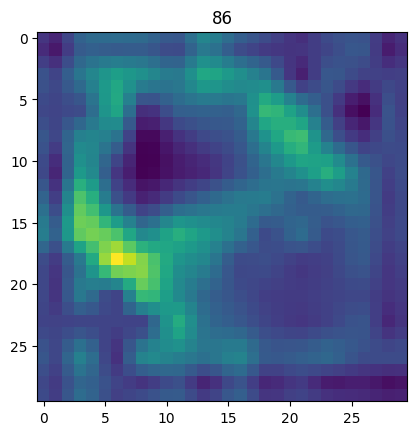

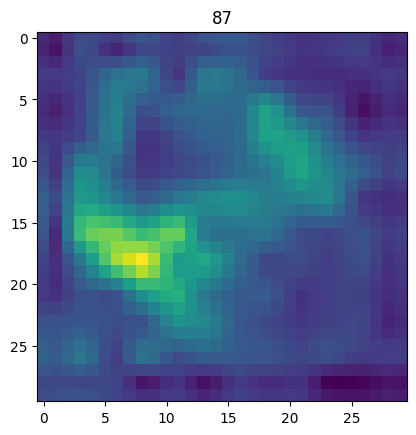

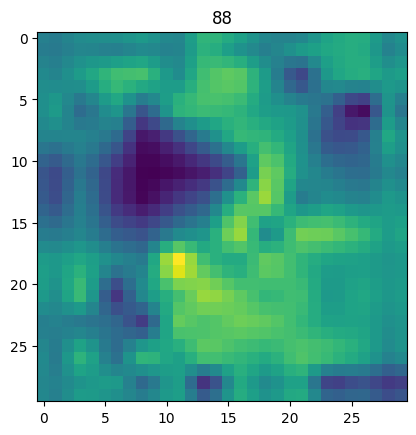

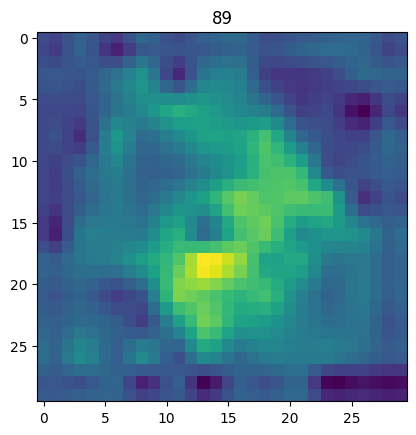

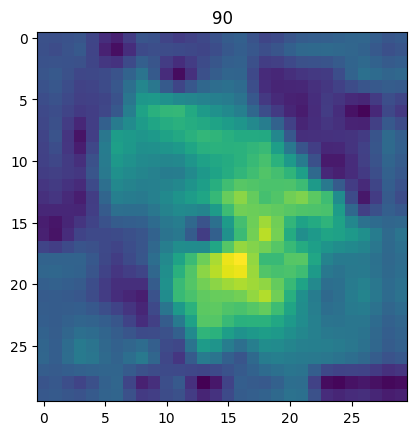

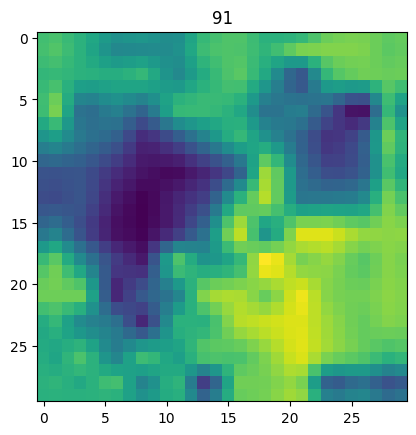

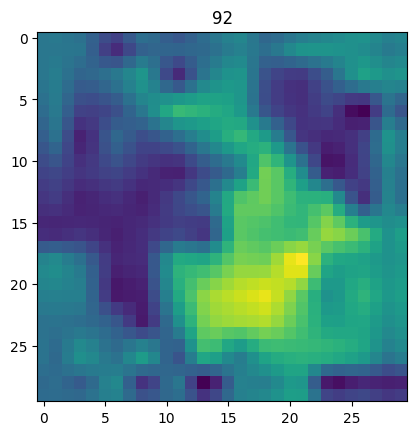

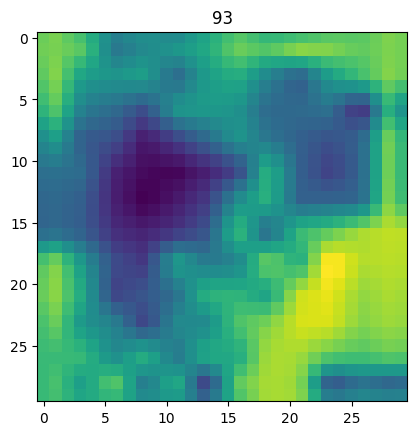

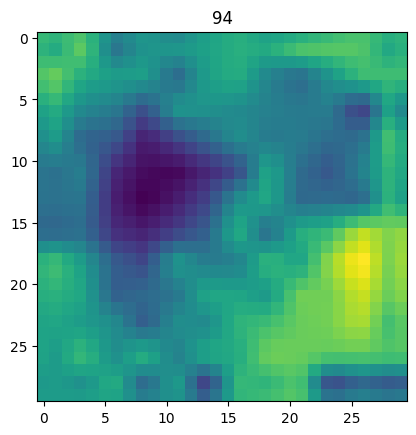

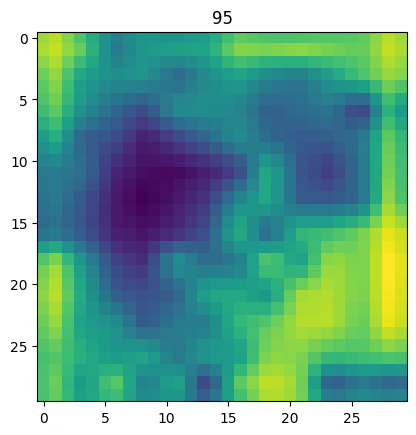

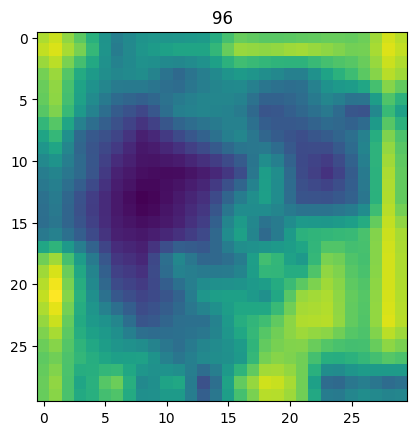

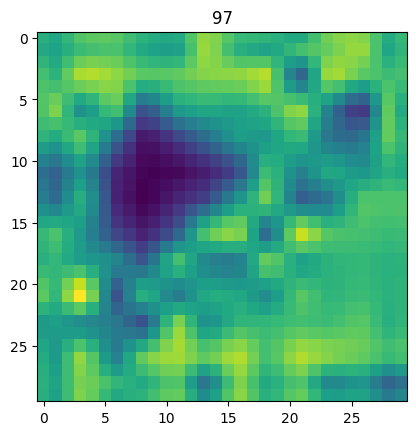

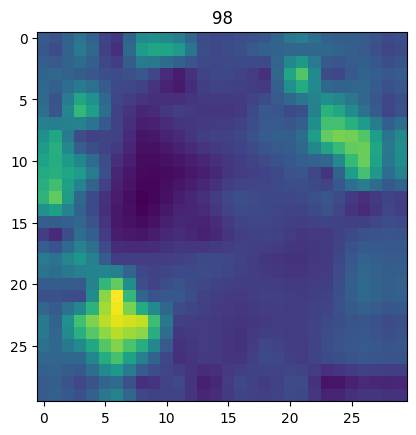

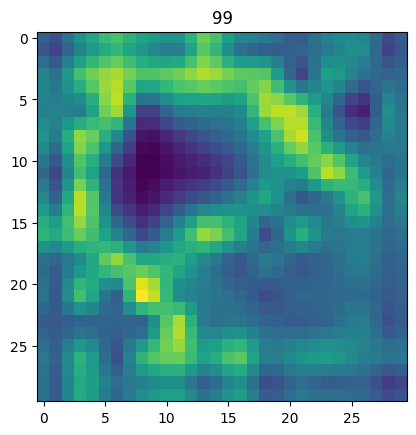

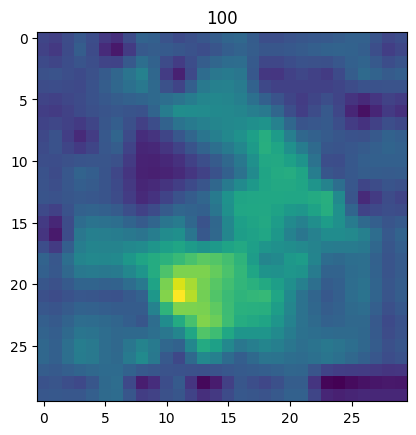

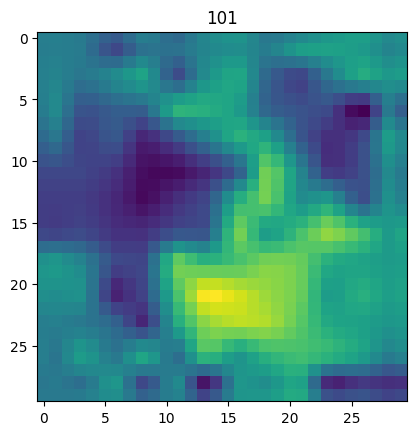

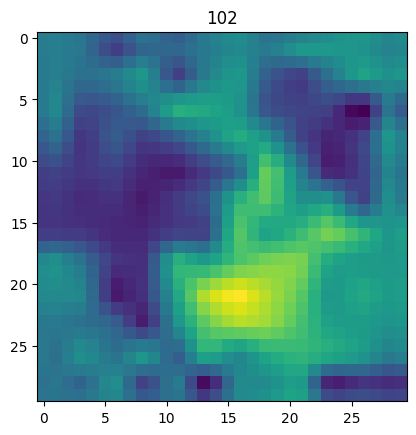

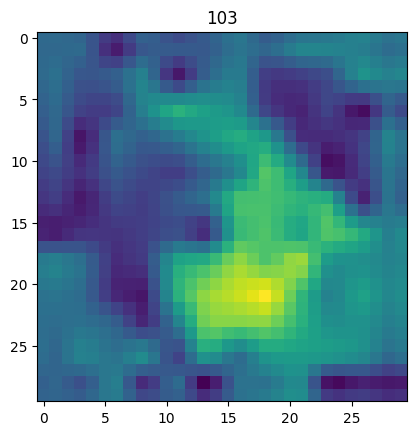

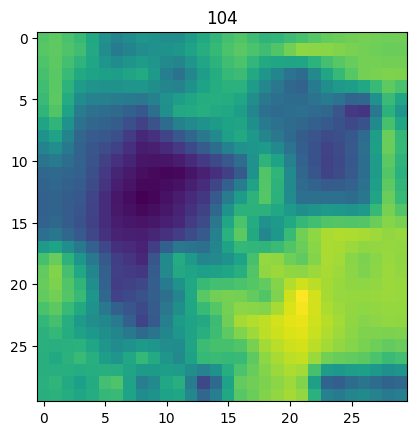

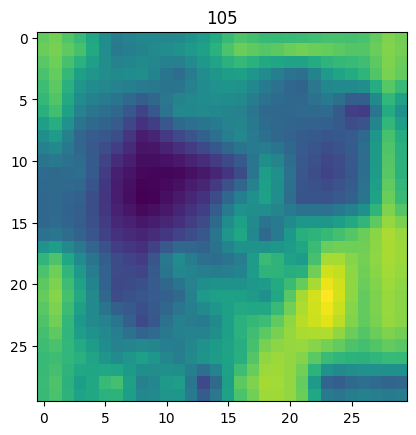

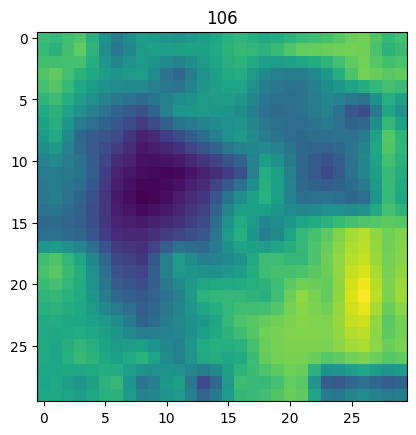

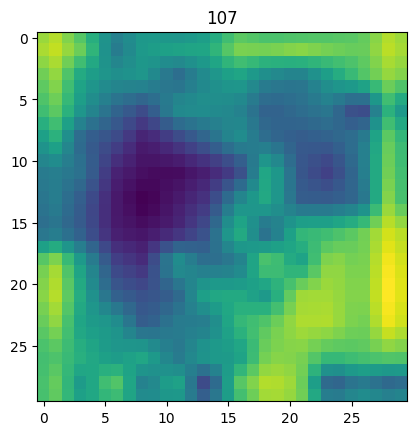

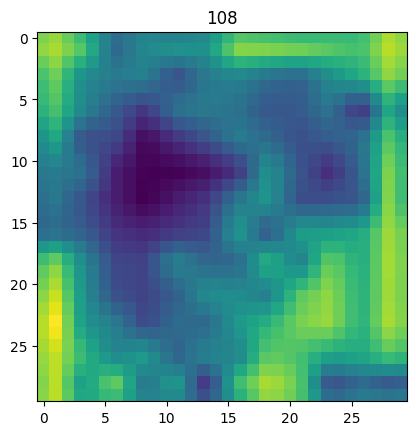

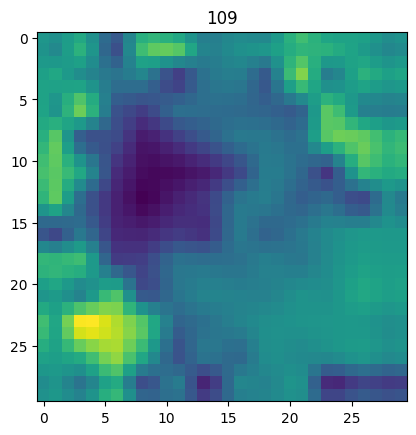

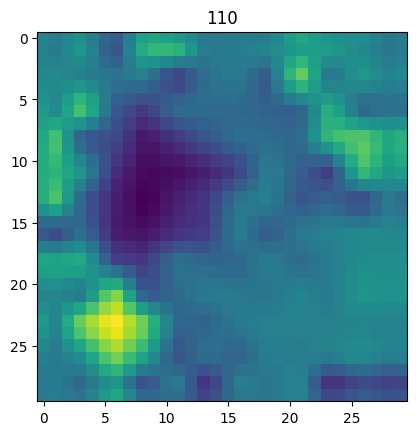

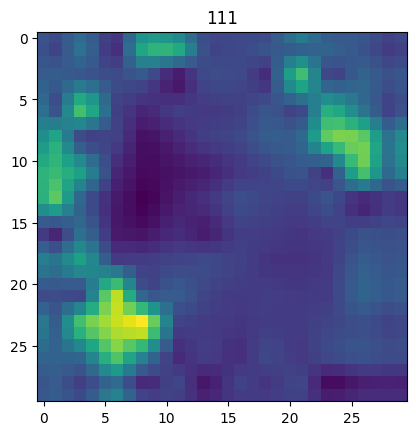

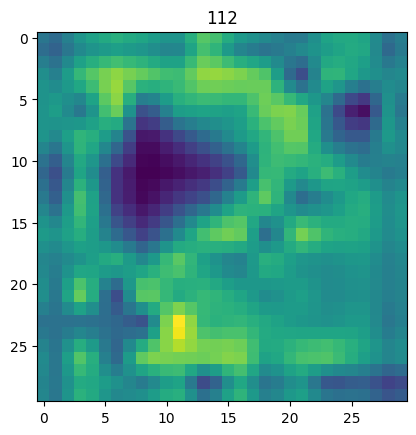

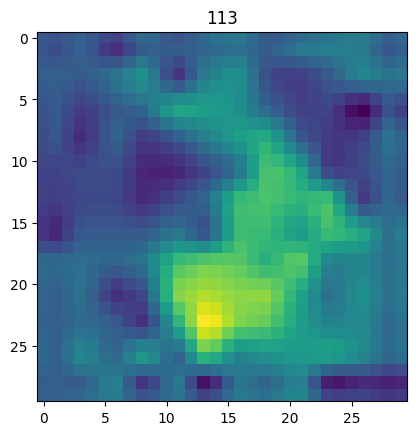

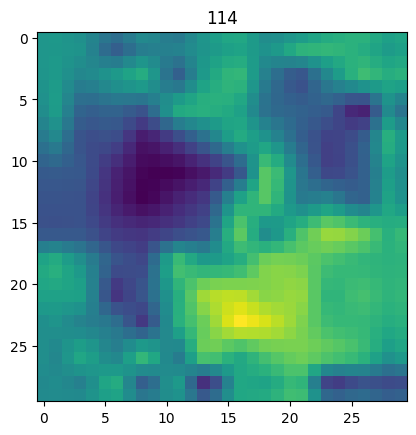

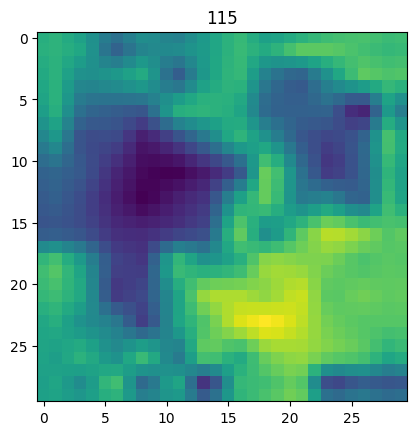

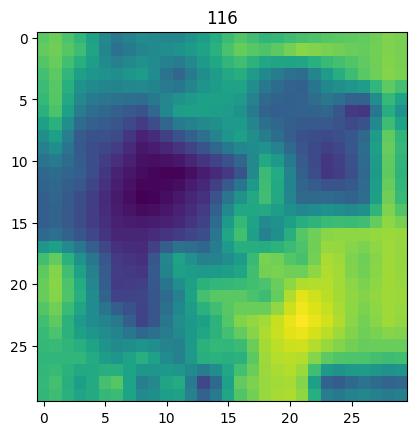

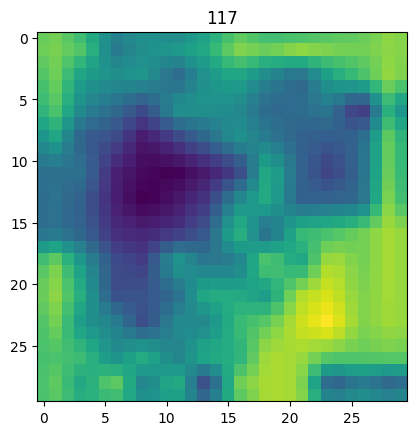

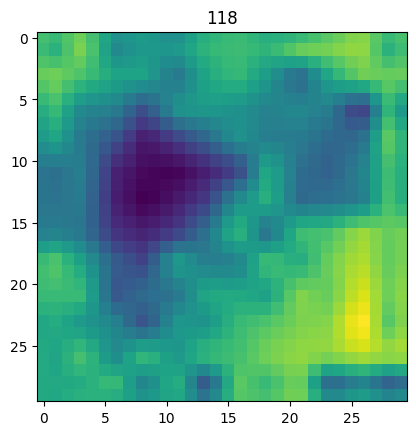

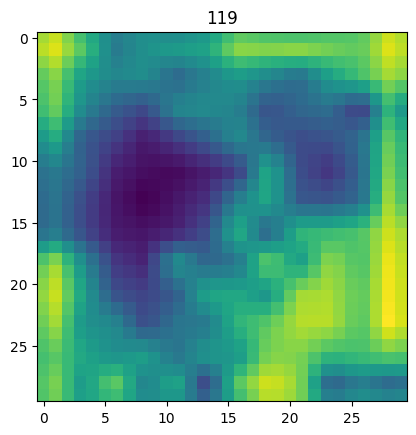

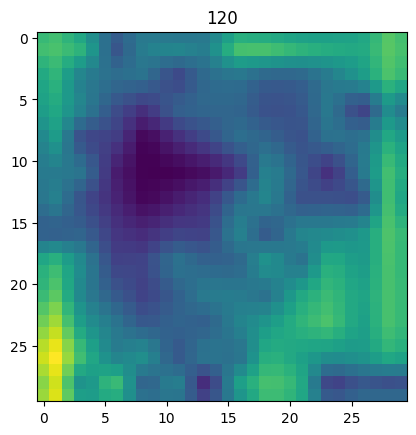

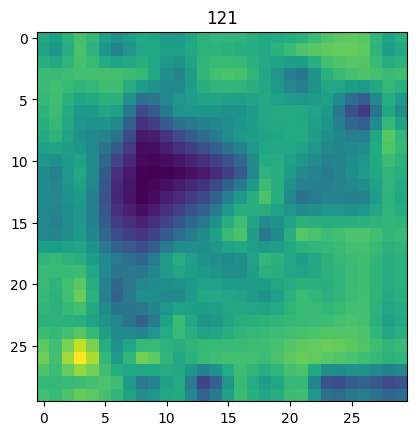

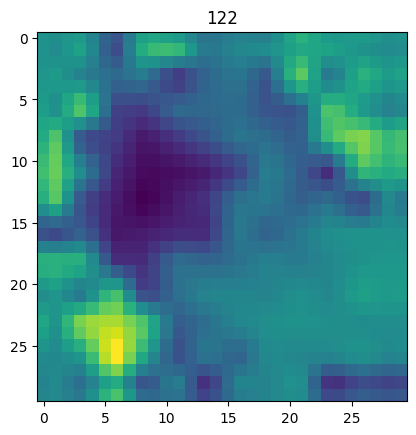

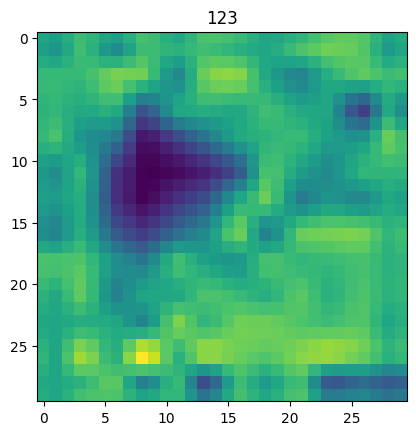

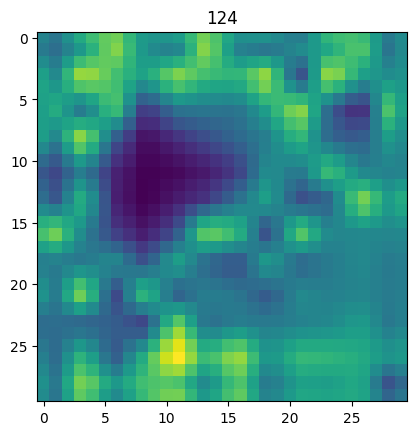

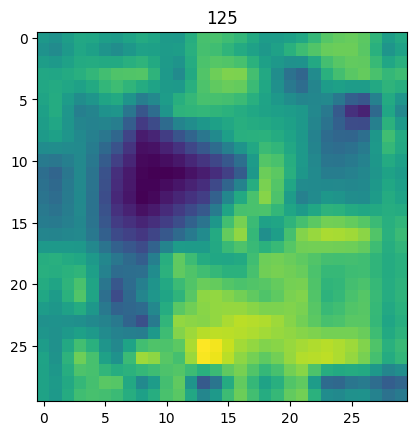

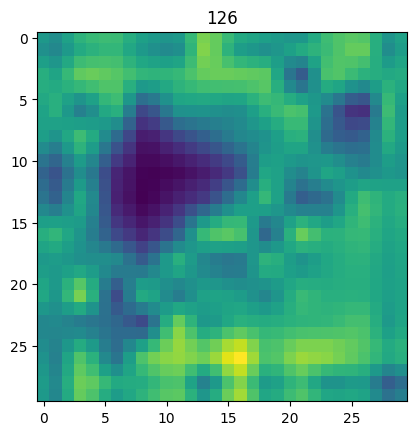

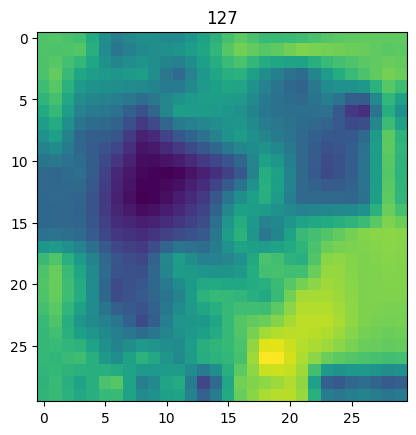

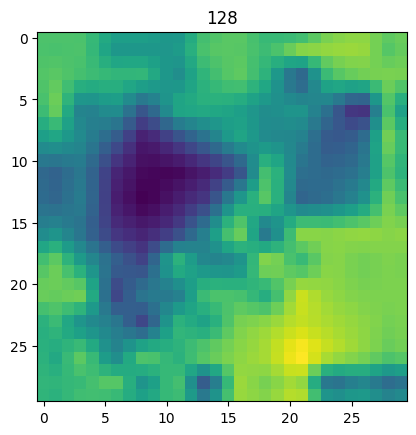

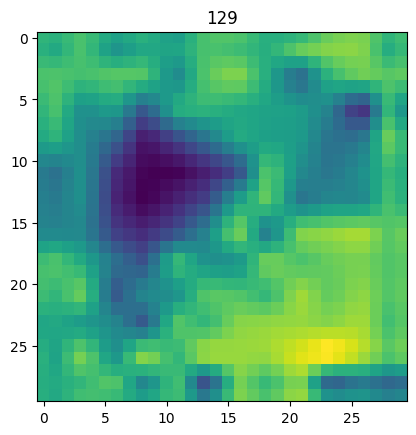

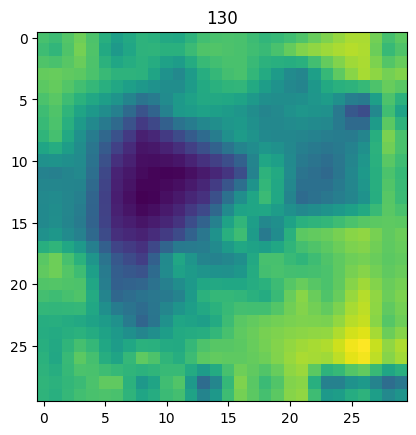

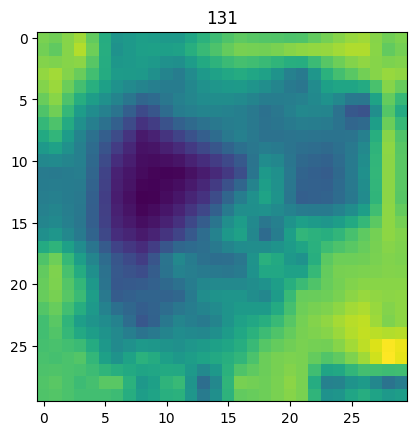

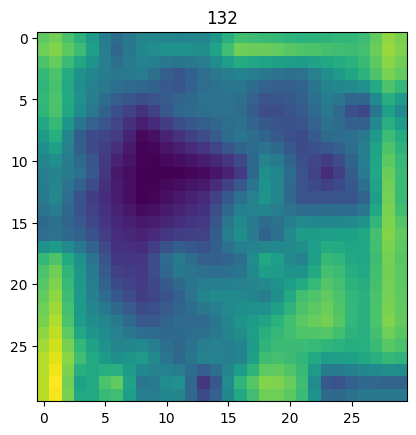

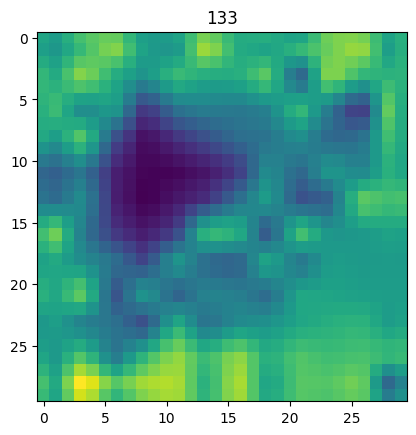

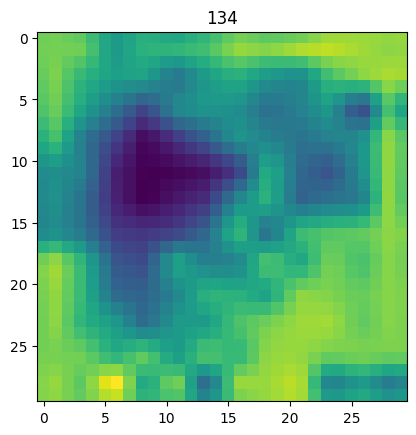

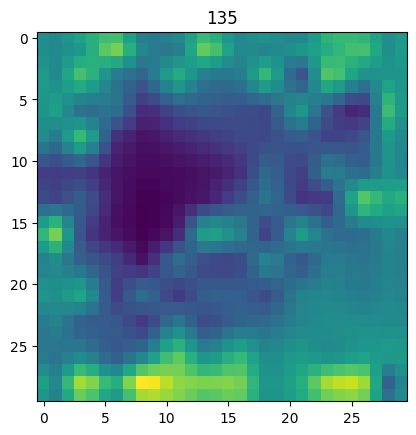

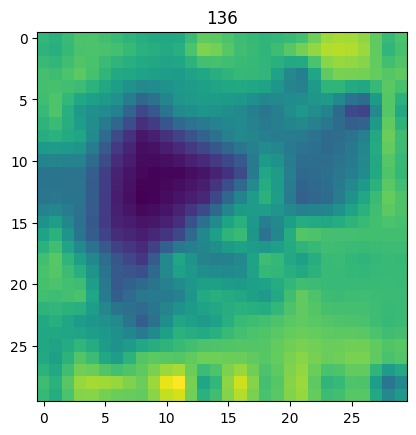

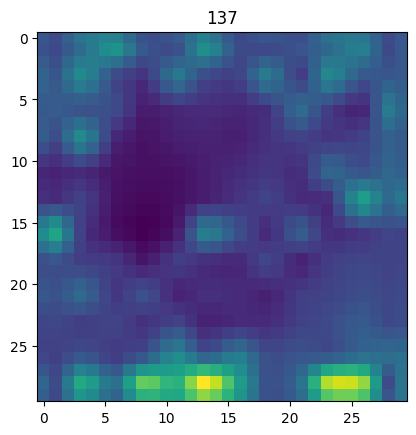

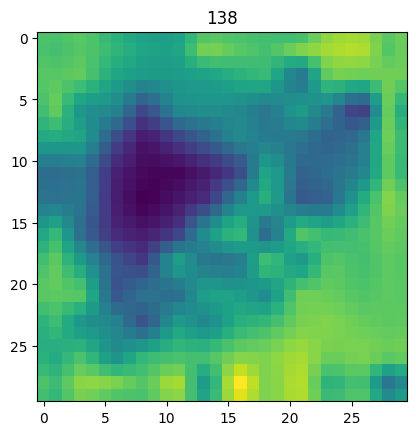

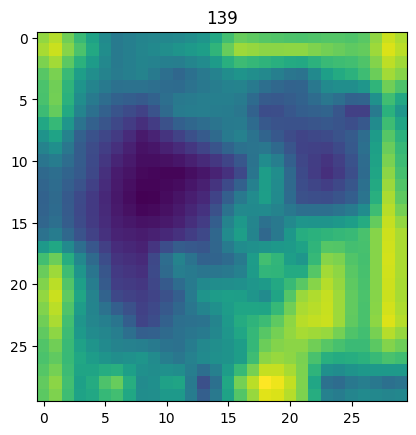

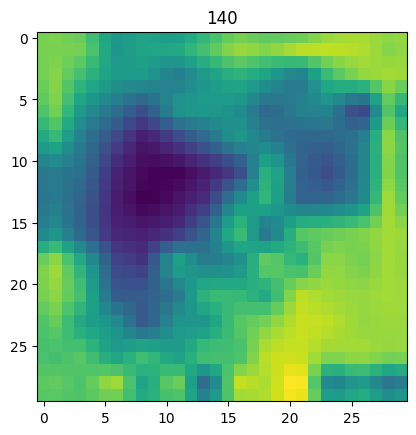

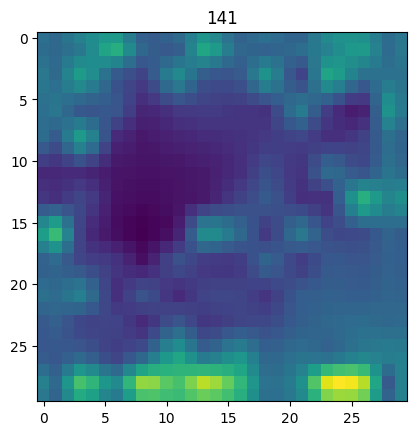

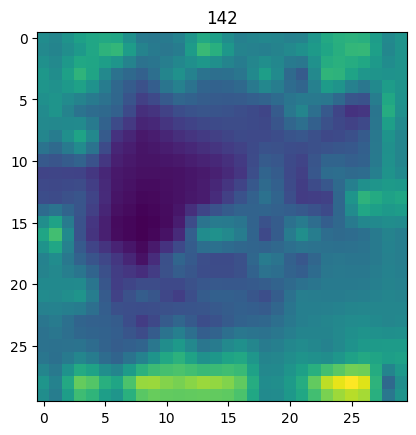

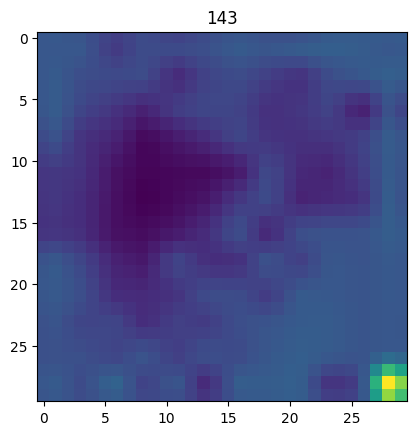

In [105]:
for i,s in enumerate(sim):
    plt.figure()
    plt.title(i)
    plt.imshow(s)